In [2]:
library(tidyverse)
library(ggrepel)
library(tidyr)
library(repr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [40]:
dat <- read.csv('../pseudobulks/pseudobulks_cluster_level/NK_cells_pseudobulk.csv')
annot_df <- read.csv('../pseudobulks/pseudobulks_cluster_level/NK_cells_metadata.csv')
rownames(dat) <- dat$index
dat <- dat[,-c(1,58)]


In [27]:
#define Min-Max normalization function
min_max_norm <- function(x) {
    (x - min(x, na.rm = T)) / (max(x, na.rm = T) - min(x, na.rm=T))
  }

#apply Min-Max normalization to first four columns in iris dataset
dat_norm <- as.data.frame(lapply(dat, min_max_norm))

In [29]:
dat_var <- apply(X = dat_norm, MARGIN = 1, FUN = var)

In [32]:
quantile(dat_var, probs = c(0.99))

99% 
0.0002502093

In [34]:
dat_norm_sub <- dat_norm[dat_var > 0.00025, ]

In [35]:
dim(dat_norm_sub)

[1] 357  56

In [46]:
head(annot_df)

,X,patient,biosample,procedure,dx,cell_counts,avg_molecules,binned_cell_counts
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,0,E12,E12D,resection,NS,152,1815.855,"(128, 512]"
2,1,E07,E07B,resection,T,41,2039.854,"(32, 128]"
3,2,E08,E08D,biopsy,NE,7,3870.143,"(0, 8]"
4,3,E11,E11B,biopsy,MT,64,3221.250,"(32, 128]"
5,4,E07,E07D2,resection,D,2,2193.500,"(0, 8]"
6,5,E07,E07C,resection,D,17,1442.823,"(8, 32]"


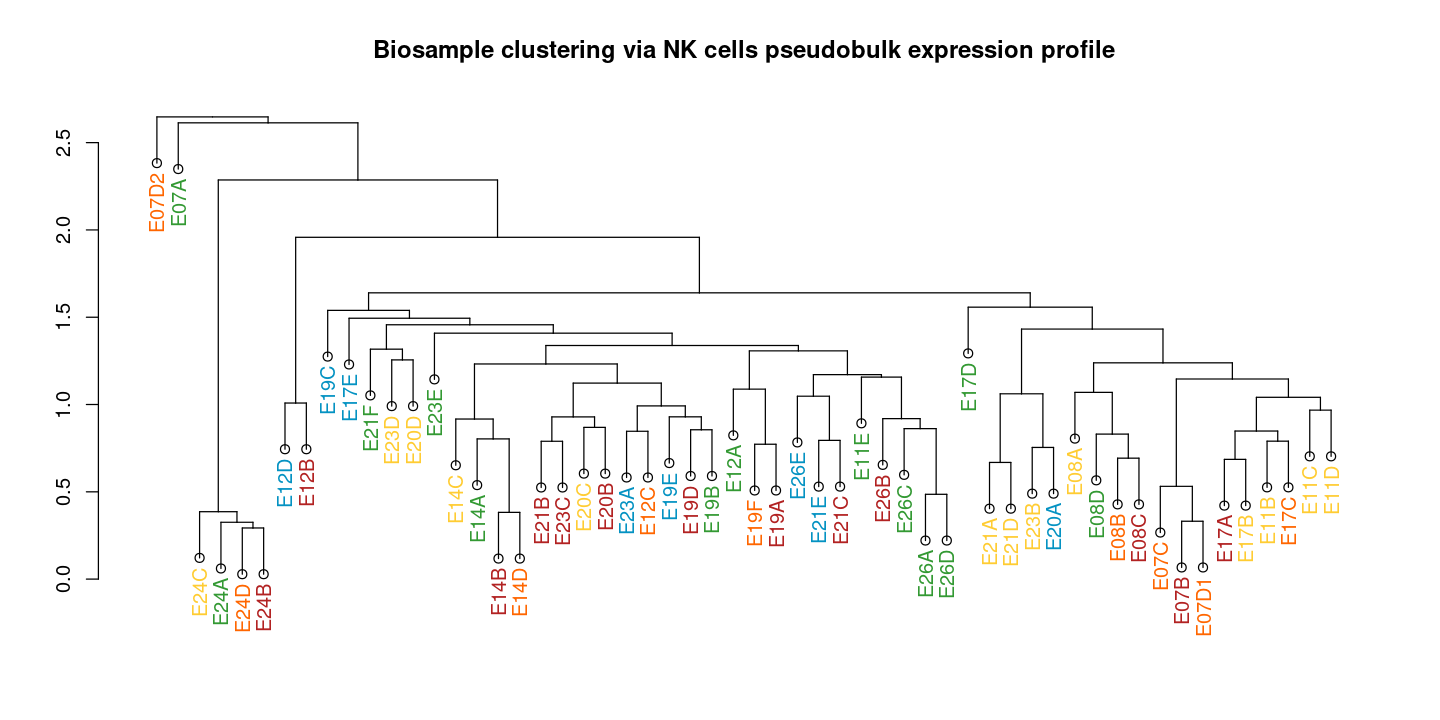

In [61]:
options(repr.plot.width=12, repr.plot.height=6)

colorCodes <- c(NE = "#339933", NS = "#0492C2", M = "#FFCC33", MT = "#FFCC33", MDT = "#FF6600", DT = "#FF6600", D = "#FF6600", T = "#B22222")

mat <- as.matrix(dat_norm_sub)

hc <- hclust(dist(t(mat)), method="average")

## function to set label color
labelCol <- function(x) {
  if (is.leaf(x)) {
    ## fetch label
    label <- attr(x, "label")
    
    ## use the following line to reset the label to one letter code
    # attr(x, "label") <- code
    this_dx <- annot_df %>% dplyr::filter(biosample == label) %>% select(dx) %>% pull()
    attr(x, "nodePar") <- list(lab.col=colorCodes[[this_dx]])
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
d <- dendrapply(as.dendrogram(hc, hang=0.1), labelCol)


plot(d, cex = 0.6, main = 'Biosample clustering via NK cells pseudobulk expression profile')


In [62]:

NK_sub_pca <- prcomp(mat, center = TRUE, scale = TRUE)

#df <- cbind(NK_sub_pca$rotation, annot_df)



In [65]:
rownames(NK_sub_pca$rotation)

[1] "E12D"  "E07B"  "E08D"  "E11B"  "E07D2" "E07C"  "E11C"  "E17D"  "E07A" 
[10] "E12A"  "E19C"  "E12B"  "E19E"  "E19D"  "E17E"  "E14B"  "E14A"  "E21B" 
[19] "E19F"  "E17C"  "E17A"  "E19A"  "E08B"  "E21E"  "E17B"  "E23C"  "E19B" 
[28] "E14C"  "E26A"  "E23D"  "E23E"  "E23B"  "E21A"  "E07D1" "E23A"  "E21F" 
[37] "E21D"  "E21C"  "E20C"  "E20B"  "E20D"  "E20A"  "E24D"  "E24C"  "E11D" 
[46] "E24B"  "E24A"  "E26E"  "E26D"  "E26C"  "E26B"  "E14D"  "E11E"  "E12C" 
[55] "E08A"  "E08C"

In [66]:
colnames(mat)

[1] "E12D"  "E07B"  "E08D"  "E11B"  "E07D2" "E07C"  "E11C"  "E17D"  "E07A" 
[10] "E12A"  "E19C"  "E12B"  "E19E"  "E19D"  "E17E"  "E14B"  "E14A"  "E21B" 
[19] "E19F"  "E17C"  "E17A"  "E19A"  "E08B"  "E21E"  "E17B"  "E23C"  "E19B" 
[28] "E14C"  "E26A"  "E23D"  "E23E"  "E23B"  "E21A"  "E07D1" "E23A"  "E21F" 
[37] "E21D"  "E21C"  "E20C"  "E20B"  "E20D"  "E20A"  "E24D"  "E24C"  "E11D" 
[46] "E24B"  "E24A"  "E26E"  "E26D"  "E26C"  "E26B"  "E14D"  "E11E"  "E12C" 
[55] "E08A"  "E08C"

In [67]:
annot_df$biosample

[1] "E12D"  "E07B"  "E08D"  "E11B"  "E07D2" "E07C"  "E11C"  "E17D"  "E07A" 
[10] "E12A"  "E19C"  "E12B"  "E19E"  "E19D"  "E17E"  "E14B"  "E14A"  "E21B" 
[19] "E19F"  "E17C"  "E17A"  "E19A"  "E08B"  "E21E"  "E17B"  "E23C"  "E19B" 
[28] "E14C"  "E26A"  "E23D"  "E23E"  "E23B"  "E21A"  "E07D1" "E23A"  "E21F" 
[37] "E21D"  "E21C"  "E20C"  "E20B"  "E20D"  "E20A"  "E24D"  "E24C"  "E11D" 
[46] "E24B"  "E24A"  "E26E"  "E26D"  "E26C"  "E26B"  "E14D"  "E11E"  "E12C" 
[55] "E08A"  "E08C"

In [74]:
NK_sub_pca <- prcomp(mat, center = TRUE, scale = TRUE)

df <- cbind(NK_sub_pca$rotation, annot_df)


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


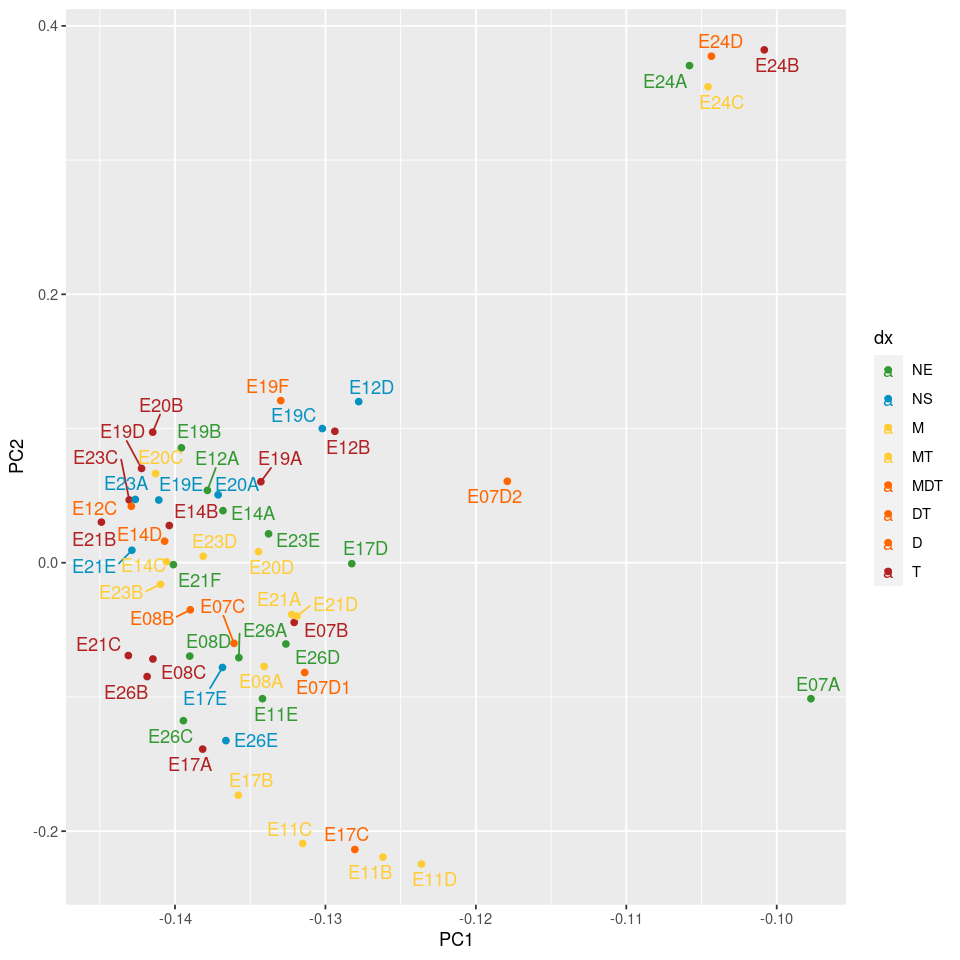

In [78]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(data = df,
       aes(x = PC1, y = PC2, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”


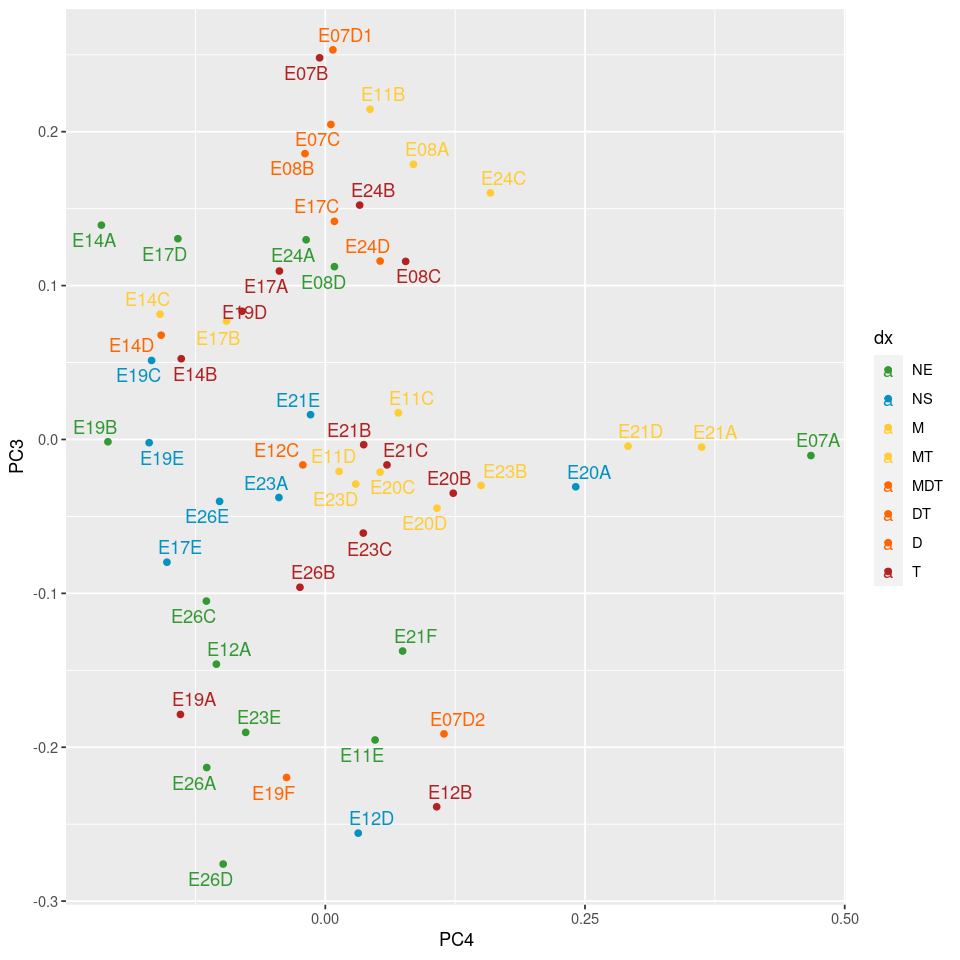

In [81]:
ggplot(data = df,
       aes(x = PC4, y = PC3, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 


Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“Use of `df$biosample` is discouraged. Use `biosample` instead.”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


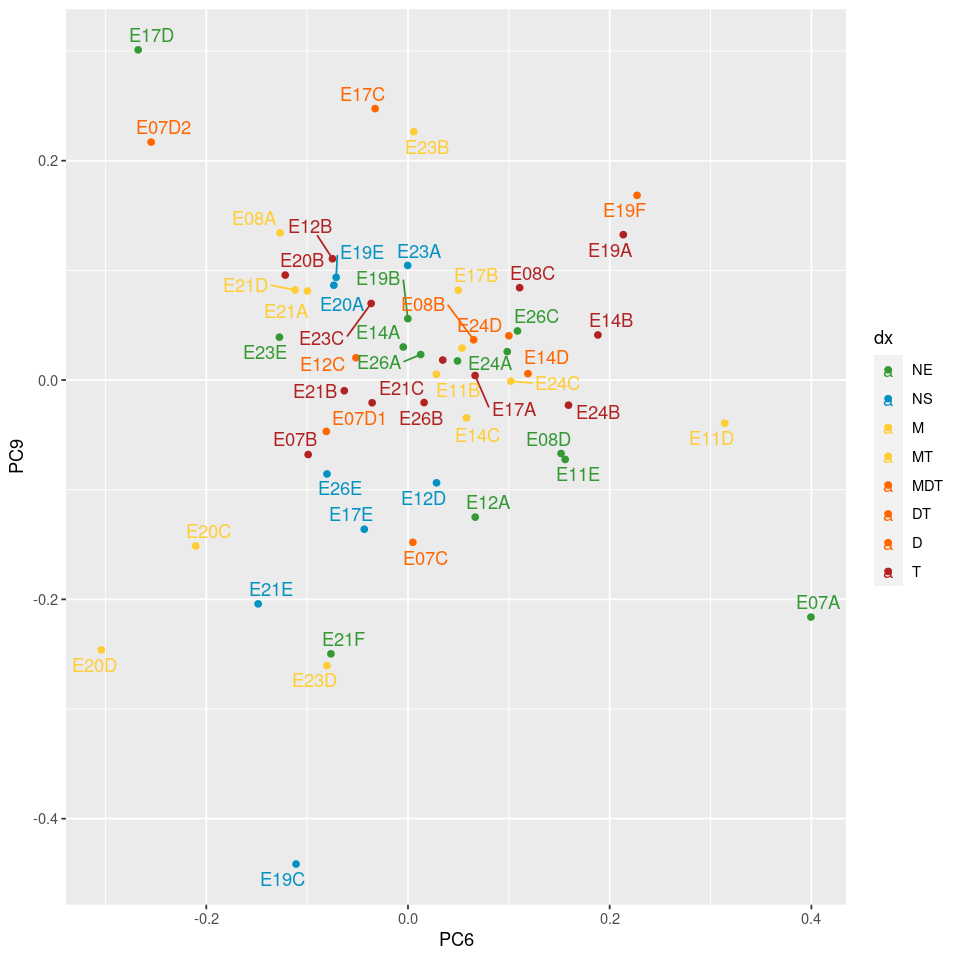

In [88]:
ggplot(data = df,
       aes(x = PC6, y = PC9, label=df$biosample, color=dx)) + 
       geom_point() +
       geom_text_repel() +
       #theme_minimal() +
    scale_color_manual(values = c("NE" = "#339933",
                                  "NS" = "#0492C2",
                                  "M"  = "#FFCC33",
                                  "MT"  = "#FFCC33",
                                  "MDT"  = "#FF6600",
                                  "DT"  = "#FF6600",
                                  "D"  = "#FF6600",
                                  "T"  = "#B22222")) 